# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [1]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0
#images should be of 28x28 adjusting the x
pixels = 784
classess = 10 #from 0 to 9 numbers so classess is 10
x_test = x_test.reshape(x_test.shape[0],-1)
x_train = x_train.reshape(x_train.shape[0],-1)
x_train.shape


(60000, 784)

#### One-hot-encode your labels here

In [4]:
#for 1.2 Question.

y_train_1 = y_train_20 =y_train_40 = y_train_60 = y_train_80 = y_train_100 = y_train

y_train_100


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
print(y_train_20)
print(y_train_40)

[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]


In [6]:
#using to_categorical fucntion
#here 10 is no of classess
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [7]:
#creating the model here
model = Sequential()

model.add(Dense(128, input_shape=(784,), activation='relu'))#input layer
model.add(Dense(128 , activation='relu')) #hidden layer 
model.add(Dropout(0.25))
model.add(Dense(10 , activation='softmax')) #ouput layer

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
#training the model 
training_model = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=250, verbose=1, shuffle=1)


Epoch 1/20
216/216 [==============================] - 1s 3ms/step - loss: 1.8546 - accuracy: 0.4620 - val_loss: 1.2284 - val_accuracy: 0.7848
Epoch 2/20
216/216 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.7327 - val_loss: 0.6568 - val_accuracy: 0.8617
Epoch 3/20
216/216 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.7992 - val_loss: 0.4790 - val_accuracy: 0.8892
Epoch 4/20
216/216 [==============================] - 1s 2ms/step - loss: 0.5894 - accuracy: 0.8306 - val_loss: 0.3952 - val_accuracy: 0.9023
Epoch 5/20
216/216 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8525 - val_loss: 0.3483 - val_accuracy: 0.9107
Epoch 6/20
216/216 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8645 - val_loss: 0.3178 - val_accuracy: 0.9142
Epoch 7/20
216/216 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8740 - val_loss: 0.2963 - val_accuracy: 0.9185
Epoch 

Text(0.5, 0, 'epoch')

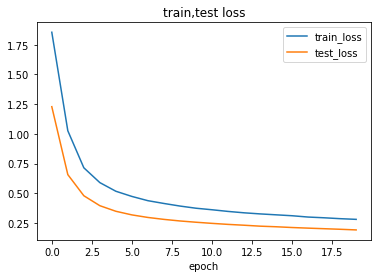

In [9]:
#plotting loss of train and test
plt.plot(training_model.history['loss'])
plt.plot(training_model.history['val_loss'])
plt.legend(['train_loss','test_loss'])
plt.title('train,test loss')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

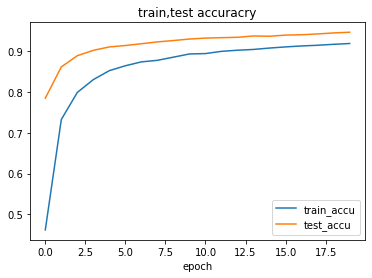

In [10]:
#plotting accuracy of train and test
plt.plot(training_model.history['accuracy'])
plt.plot(training_model.history['val_accuracy'])
plt.legend(['train_accu','test_accu'])
plt.title('train,test accuracry')
plt.xlabel('epoch')

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


## 20% random


In [11]:

twenty_percent = int(0.2*len(y_train_1))
y_train_20[:twenty_percent] = np.random.randint(0,10, twenty_percent)
y_train_20

array([1, 6, 9, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_train_20 = to_categorical(y_train_20,10)
y_train_20

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
model_20 = Sequential()

model_20.add(Dense(128, input_shape=(784,), activation='relu'))#input layer
model_20.add(Dense(128 , activation='relu')) #hidden layer 
model_20.add(Dropout(0.25))
model_20.add(Dense(10 , activation='softmax')) #ouput layer

model_20.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_20.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
training_model_20 = model_20.fit(x_train, y_train_20, validation_split=0.1, epochs=20, batch_size=250, verbose=1, shuffle=1)

Epoch 1/20
216/216 [==============================] - 1s 3ms/step - loss: 2.0453 - accuracy: 0.3444 - val_loss: 1.4833 - val_accuracy: 0.7490
Epoch 2/20
216/216 [==============================] - 0s 2ms/step - loss: 1.6130 - accuracy: 0.5642 - val_loss: 0.9733 - val_accuracy: 0.8395
Epoch 3/20
216/216 [==============================] - 0s 2ms/step - loss: 1.4582 - accuracy: 0.6190 - val_loss: 0.7991 - val_accuracy: 0.8722
Epoch 4/20
216/216 [==============================] - 1s 2ms/step - loss: 1.3925 - accuracy: 0.6528 - val_loss: 0.7194 - val_accuracy: 0.8905
Epoch 5/20
216/216 [==============================] - 1s 2ms/step - loss: 1.3557 - accuracy: 0.6698 - val_loss: 0.6699 - val_accuracy: 0.9022
Epoch 6/20
216/216 [==============================] - 0s 2ms/step - loss: 1.3265 - accuracy: 0.6827 - val_loss: 0.6351 - val_accuracy: 0.9082
Epoch 7/20
216/216 [==============================] - 0s 2ms/step - loss: 1.3088 - accuracy: 0.6905 - val_loss: 0.6131 - val_accuracy: 0.9130
Epoch 

Text(0.5, 0, 'epoch')

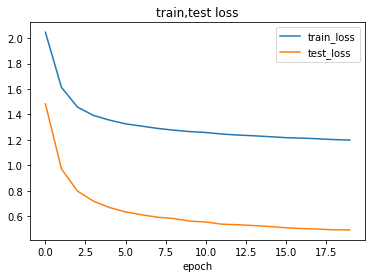

In [15]:
#plotting loss of train and test
plt.plot(training_model_20.history['loss'])
plt.plot(training_model_20.history['val_loss'])
plt.legend(['train_loss','test_loss'])
plt.title('train,test loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

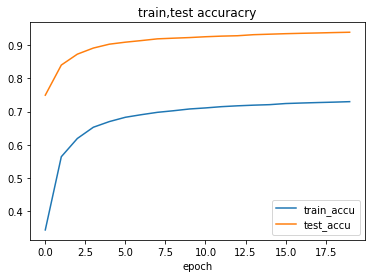

In [16]:
#plotting accuracy of train and test
plt.plot(training_model_20.history['accuracy'])
plt.plot(training_model_20.history['val_accuracy'])
plt.legend(['train_accu','test_accu'])
plt.title('train,test accuracry')
plt.xlabel('epoch')

## 40% Random

In [17]:
fourty_percent = int(0.4*len(y_train_1))

y_train_40[:fourty_percent] = np.random.randint(0,10, fourty_percent)
y_train_40

array([1, 0, 9, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train_40 = to_categorical(y_train_40,10)

In [19]:
model_40 = Sequential()

model_40.add(Dense(128, input_shape=(784,), activation='relu'))#input layer
model_40.add(Dense(128 , activation='relu')) #hidden layer 
model_40.add(Dropout(0.25))
model_40.add(Dense(10 , activation='softmax')) #ouput layer

model_40.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_40.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [20]:
training_model_40 = model_40.fit(x_train, y_train_40, validation_split=0.1, epochs=20, batch_size=250, verbose=1, shuffle=1)

Epoch 1/20
216/216 [==============================] - 1s 3ms/step - loss: 2.2465 - accuracy: 0.2000 - val_loss: 1.9337 - val_accuracy: 0.6183
Epoch 2/20
216/216 [==============================] - 1s 2ms/step - loss: 2.0447 - accuracy: 0.3807 - val_loss: 1.4906 - val_accuracy: 0.7933
Epoch 3/20
216/216 [==============================] - 1s 2ms/step - loss: 1.9225 - accuracy: 0.4451 - val_loss: 1.2359 - val_accuracy: 0.8417
Epoch 4/20
216/216 [==============================] - 1s 2ms/step - loss: 1.8700 - accuracy: 0.4710 - val_loss: 1.1209 - val_accuracy: 0.8647
Epoch 5/20
216/216 [==============================] - 1s 2ms/step - loss: 1.8437 - accuracy: 0.4867 - val_loss: 1.0638 - val_accuracy: 0.8785
Epoch 6/20
216/216 [==============================] - 1s 2ms/step - loss: 1.8253 - accuracy: 0.5002 - val_loss: 1.0237 - val_accuracy: 0.8880
Epoch 7/20
216/216 [==============================] - 1s 2ms/step - loss: 1.8107 - accuracy: 0.5083 - val_loss: 0.9981 - val_accuracy: 0.8968
Epoch 

Text(0.5, 0, 'epoch')

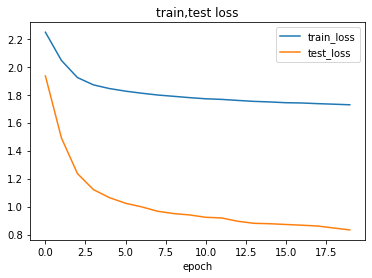

In [21]:
plt.plot(training_model_40.history['loss'])
plt.plot(training_model_40.history['val_loss'])
plt.legend(['train_loss','test_loss'])
plt.title('train,test loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

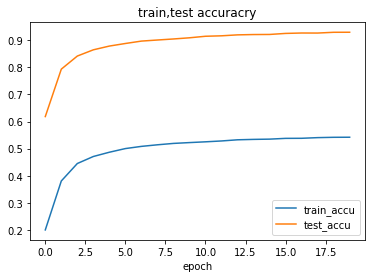

In [22]:
plt.plot(training_model_40.history['accuracy'])
plt.plot(training_model_40.history['val_accuracy'])
plt.legend(['train_accu','test_accu'])
plt.title('train,test accuracry')
plt.xlabel('epoch')

## 60% random

In [23]:
sixty_percent = int(0.6*len(y_train_1))

y_train_60[:sixty_percent] = np.random.randint(0,10, sixty_percent)

y_train_60 = to_categorical(y_train_60,10)

In [24]:
model_60 = Sequential()

model_60.add(Dense(128, input_shape=(784,), activation='relu'))#input layer
model_60.add(Dense(128 , activation='relu')) #hidden layer 
model_60.add(Dropout(0.25))
model_60.add(Dense(10 , activation='softmax')) #ouput layer

model_60.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_60.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [25]:
training_model_60 = model_60.fit(x_train, y_train_60, validation_split=0.1, epochs=20, batch_size=250, verbose=1, shuffle=1)

Epoch 1/20
216/216 [==============================] - 1s 3ms/step - loss: 2.2914 - accuracy: 0.1477 - val_loss: 2.0671 - val_accuracy: 0.5463
Epoch 2/20
216/216 [==============================] - 0s 2ms/step - loss: 2.2243 - accuracy: 0.2342 - val_loss: 1.8595 - val_accuracy: 0.7125
Epoch 3/20
216/216 [==============================] - 1s 3ms/step - loss: 2.1872 - accuracy: 0.2736 - val_loss: 1.7033 - val_accuracy: 0.7742
Epoch 4/20
216/216 [==============================] - 1s 3ms/step - loss: 2.1647 - accuracy: 0.2917 - val_loss: 1.5988 - val_accuracy: 0.8102
Epoch 5/20
216/216 [==============================] - 1s 2ms/step - loss: 2.1511 - accuracy: 0.3061 - val_loss: 1.5358 - val_accuracy: 0.8350
Epoch 6/20
216/216 [==============================] - 1s 3ms/step - loss: 2.1419 - accuracy: 0.3156 - val_loss: 1.4942 - val_accuracy: 0.8502
Epoch 7/20
216/216 [==============================] - 1s 3ms/step - loss: 2.1333 - accuracy: 0.3216 - val_loss: 1.4597 - val_accuracy: 0.8577
Epoch 

Text(0.5, 0, 'epoch')

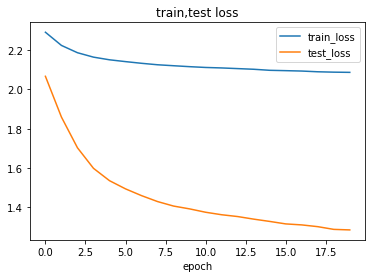

In [26]:
plt.plot(training_model_60.history['loss'])
plt.plot(training_model_60.history['val_loss'])
plt.legend(['train_loss','test_loss'])
plt.title('train,test loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

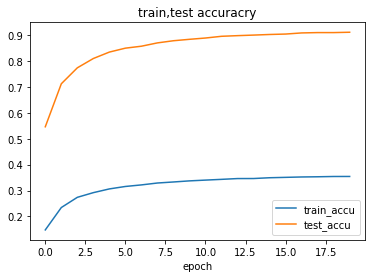

In [27]:
plt.plot(training_model_60.history['accuracy'])
plt.plot(training_model_60.history['val_accuracy'])
plt.legend(['train_accu','test_accu'])
plt.title('train,test accuracry')
plt.xlabel('epoch')

## 80% random

In [28]:
eighty_percent = int(0.8*len(y_train_1))

y_train_80[:eighty_percent] = np.random.randint(0,10, eighty_percent)

y_train_80 = to_categorical(y_train_80,10)

In [29]:
model_80 = Sequential()

model_80.add(Dense(128, input_shape=(784,), activation='relu'))#input layer
model_80.add(Dense(128 , activation='relu')) #hidden layer 
model_80.add(Dropout(0.25))
model_80.add(Dense(10 , activation='softmax')) #ouput layer

model_80.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_80.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [30]:
training_model_80 = model_80.fit(x_train, y_train_80, validation_split=0.1, epochs=20, batch_size=250, verbose=1, shuffle=1)

Epoch 1/20
216/216 [==============================] - 1s 3ms/step - loss: 2.3214 - accuracy: 0.1076 - val_loss: 2.2206 - val_accuracy: 0.2573
Epoch 2/20
216/216 [==============================] - 1s 2ms/step - loss: 2.3071 - accuracy: 0.1169 - val_loss: 2.1805 - val_accuracy: 0.3715
Epoch 3/20
216/216 [==============================] - 1s 2ms/step - loss: 2.3004 - accuracy: 0.1266 - val_loss: 2.1524 - val_accuracy: 0.4560
Epoch 4/20
216/216 [==============================] - 1s 3ms/step - loss: 2.2961 - accuracy: 0.1351 - val_loss: 2.1298 - val_accuracy: 0.5193
Epoch 5/20
216/216 [==============================] - 1s 2ms/step - loss: 2.2941 - accuracy: 0.1374 - val_loss: 2.1093 - val_accuracy: 0.5748
Epoch 6/20
216/216 [==============================] - 0s 2ms/step - loss: 2.2917 - accuracy: 0.1459 - val_loss: 2.0933 - val_accuracy: 0.6125
Epoch 7/20
216/216 [==============================] - 1s 2ms/step - loss: 2.2902 - accuracy: 0.1500 - val_loss: 2.0774 - val_accuracy: 0.6423
Epoch 

Text(0.5, 0, 'epoch')

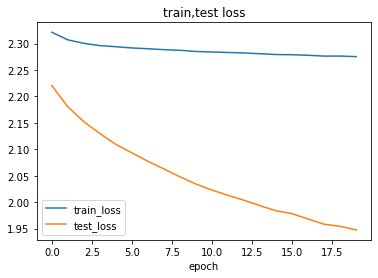

In [31]:
plt.plot(training_model_80.history['loss'])
plt.plot(training_model_80.history['val_loss'])
plt.legend(['train_loss','test_loss'])
plt.title('train,test loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

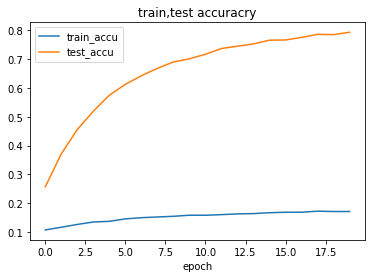

In [32]:
plt.plot(training_model_80.history['accuracy'])
plt.plot(training_model_80.history['val_accuracy'])
plt.legend(['train_accu','test_accu'])
plt.title('train,test accuracry')
plt.xlabel('epoch')

## 100% random

In [33]:
Hundred_percent = int(len(y_train_1))

y_train_100[:Hundred_percent] = np.random.randint(0,10, Hundred_percent)

y_train_100 = to_categorical(y_train_100,10)

In [34]:
model_100 = Sequential()

model_100.add(Dense(128, input_shape=(784,), activation='relu'))#input layer
model_100.add(Dense(128 , activation='relu')) #hidden layer 
model_100.add(Dropout(0.25))
model_100.add(Dense(10 , activation='softmax')) #ouput layer

model_100.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_100.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [35]:
training_model_100 = model_100.fit(x_train, y_train_100, validation_split=0.1, epochs=20, batch_size=250, verbose=1, shuffle=1)

Epoch 1/20
216/216 [==============================] - 1s 4ms/step - loss: 2.3276 - accuracy: 0.1008 - val_loss: 2.3112 - val_accuracy: 0.1013
Epoch 2/20
216/216 [==============================] - 1s 2ms/step - loss: 2.3157 - accuracy: 0.1014 - val_loss: 2.3084 - val_accuracy: 0.1018
Epoch 3/20
216/216 [==============================] - 1s 2ms/step - loss: 2.3115 - accuracy: 0.1009 - val_loss: 2.3074 - val_accuracy: 0.1002
Epoch 4/20
216/216 [==============================] - 0s 2ms/step - loss: 2.3089 - accuracy: 0.1014 - val_loss: 2.3065 - val_accuracy: 0.1035
Epoch 5/20
216/216 [==============================] - 1s 2ms/step - loss: 2.3070 - accuracy: 0.1033 - val_loss: 2.3059 - val_accuracy: 0.1048
Epoch 6/20
216/216 [==============================] - 0s 2ms/step - loss: 2.3058 - accuracy: 0.1040 - val_loss: 2.3056 - val_accuracy: 0.1063
Epoch 7/20
216/216 [==============================] - 0s 2ms/step - loss: 2.3051 - accuracy: 0.1034 - val_loss: 2.3053 - val_accuracy: 0.1062
Epoch 

Text(0.5, 0, 'epoch')

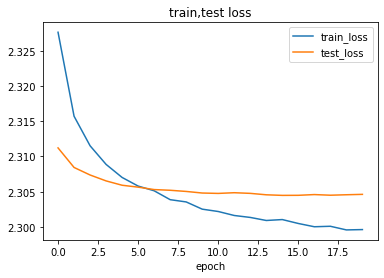

In [36]:
plt.plot(training_model_100.history['loss'])
plt.plot(training_model_100.history['val_loss'])
plt.legend(['train_loss','test_loss'])
plt.title('train,test loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

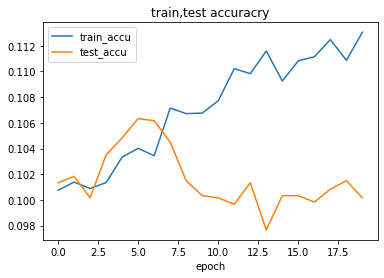

In [37]:
plt.plot(training_model_100.history['accuracy'])
plt.plot(training_model_100.history['val_accuracy'])
plt.legend(['train_accu','test_accu'])
plt.title('train,test accuracry')
plt.xlabel('epoch')